# Supervised Machine Learning 

# Introduction: 
Work with bank data to understand more about why a person signs a contract with the bank. The data encompasses information about persons, the outreach by the bank, as well as if the bank had reached their target in getting a customer to sign a contract with them. 
# Method: 
Do a small EDA on data and fit the model to K Nearest Neighbors. After, look at other models to see which would work best with this dataset and the goal in mind
The target goal is to determine what factor most affects target (if a customer signs a contract or not)

In [2]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Look for Missing values

In [3]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Handle Missing Values

#### Length of Dataset

In [4]:
len(df)

41188

#### Sum of missing values (coded as unknown) in column

In [5]:
(df.age == 'unknown').sum()

0

In [6]:
(df.job == 'unknown').sum()

330

In [7]:
(df.month== 'unknown').sum()

0

In [8]:
(df.marital== 'unknown').sum()

80

In [9]:
(df.education== 'unknown').sum()

1731

In [10]:
(df.housing== 'unknown').sum()

990

Columns that have missing values are the categorical columns. The highest number of missing values is in the education column with 1731. The entire data frame is 41,000 data points. This is 2% of the dataset missing, this is not enough data to delete and we could be getting rid of valuable data other than education. 

## Data Types

For columns that are categorial, they need to be changed to numeric to fit to the machine learning model. Below all columns categorical will be made numeric

In [11]:
#Target Column
# 0 = Yes
#1 = No
df['Target']= df.y.replace(to_replace=['no', 'yes'], value=[0, 1])

In [12]:
#Job Column
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [13]:
# 1 = Housemaid
#2 = Services
#3 = Admin
#4 = Blue Collar
#5 = Retired
#6 = Technician
#7 = Management
#8 = Unemployed
#9 = Self Employed
#10 = Unknown
#11 = Entreprenuer
#12 = Student
df['job'] = df.job.replace(to_replace=['housemaid', 'services', 'admin.','blue-collar', 'retired','technician', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student'],value = [0,1,2,3,4,5,6,7,8, 9,10,11])

In [14]:
#Education Column
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [15]:
#1 = Basic 4 yr
#2 = High School
#3 = Basic 6 yr
#4 = Basic 9 yr
#5 = Professional Course
#6 = Unknown
#7 = University Degree
df['education'] = df.education.replace(to_replace= ['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], value = [1,2,3,4,5,6,7,8])

In [16]:
#Contact Column
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [17]:
#1 = Telephone
#2 = Cellular
df['contact'] = df.contact.replace(to_replace= ['telephone', 'cellular'], value = [1,2])

In [18]:
#Marital Column 
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [19]:
#1 = Married
#2 = Single
#3 = Divorced
#4 = Unknown
df['marital'] = df.marital.replace(to_replace= ['married', 'single', 'divorced', 'unknown'], value = [1,2,3,4])

In [20]:
#Default Column
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [21]:
#1 = No
#2 = Unknown
#3 = Yes
df['default'] = df.default.replace(to_replace= ['no', 'unknown', 'yes'], value = [1,2,3])

In [22]:
#Housing Column
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [23]:
#1 = No
#2 = Yes
#3 = Unknown
df['housing'] = df.housing.replace(to_replace= ['no', 'yes', 'unknown'], value = [1,2,3])

In [24]:
#Default Column
df['default'].unique()

array([1, 2, 3])

In [25]:
#1 = No
#2 = Unknown
#3 = yes
df['default'] = df.default.replace(to_replace= ['no', 'unknown', 'yes'], value = [1,2,3])

In [26]:
#Loan Column
df['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [27]:
#1 = No
#2 = Yes
#3 = Unknown
df['loan'] = df.loan.replace(to_replace= ['no', 'yes', 'unknown'], value = [1,2,3])

In [28]:
#Month Column
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [29]:
#1 = May
#2 = Jun
#3 = July
#4 = August
#5 = October
#6 = November
#7 = December 
#8 = March 
#9 = April 
#10 = September 
df['month'] = df.month.replace(to_replace= ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], value = [1,2,3,4,5,6,7,8,9,10])

In [30]:
#Day of Week Column
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [31]:
#1 = Monday
#2 = Tuesday
#3 = Wednesday
#4 = Thursday 
#5 = Friday
df['day_of_week'] = df.day_of_week.replace(to_replace= ['mon', 'tue', 'wed', 'thu', 'fri'], value = [1,2,3,4,5])

In [32]:
df['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [33]:
df['poutcome'] = df.poutcome.replace(to_replace= ['nonexistent', 'failure', 'success'], value = [1,2,3])

In [34]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Target
0,56,0,1,1,1,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,1,1,2,2,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,1,1,2,1,2,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,2,1,3,1,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,1,1,2,1,1,2,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,4,1,5,1,2,1,2,6,5,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,3,1,5,1,1,1,2,6,5,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,4,1,7,1,2,1,2,6,5,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,5,1,5,1,1,1,2,6,5,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes,1


## EDA

In [35]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Target
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.795644,1.510634,4.277532,1.208872,1.571914,1.199767,1.634748,3.250097,2.979581,...,2.567593,962.475454,0.172963,1.169904,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.491859,0.696779,2.185525,0.406686,0.541209,0.456002,0.481507,2.429079,1.411514,...,2.770014,186.910907,0.494901,0.455754,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,5.000000,2.000000,7.000000,1.000000,2.000000,1.000000,2.000000,4.000000,4.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,4.000000,8.000000,3.000000,3.000000,3.000000,2.000000,10.000000,5.000000,...,56.000000,999.000000,7.000000,3.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Rename Columns for Readability

In [38]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Target
0,56,0,1,1,1,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,1,1,2,2,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,1,1,2,1,2,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,2,1,3,1,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,1,1,2,1,1,2,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,4,1,5,1,2,1,2,6,5,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,3,1,5,1,1,1,2,6,5,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,4,1,7,1,2,1,2,6,5,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,5,1,5,1,1,1,2,6,5,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [39]:
df=df.rename(columns = {'y':'Target', 'poutcome':'previous_outcome'})

In [40]:
df['job'] = df['job'].replace(['blue-collar'], ['bluecollar'])

In [41]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Target,Target
0,56,0,1,1,1,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,1,1,2,2,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,1,1,2,1,2,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,2,1,3,1,1,1,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,1,1,2,1,1,2,1,1,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0


# Investigating Variables

Look at correlations between all of the varables and Target

<AxesSubplot:>

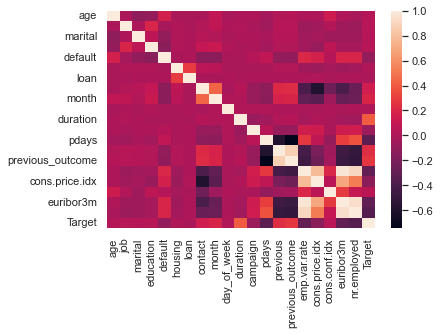

In [42]:
cor = df.corr()
sns.heatmap(cor)

Look at each correlation coefficient as the heatmap had only a few correlations and it was unclear how much they were correlated

In [43]:
cor

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Target
age,1.000000,-0.014993,-0.114983,-0.091900,0.164965,-0.001923,-0.006397,-0.007021,0.083423,-0.018486,...,0.004594,-0.034369,0.024365,0.026371,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,-0.014993,1.000000,-0.000965,0.192795,-0.023549,0.006694,-0.005909,0.021200,0.073373,-0.000986,...,-0.016045,-0.044428,0.042798,0.040643,-0.065368,-0.042785,0.023762,-0.055631,-0.065477,0.045647
marital,-0.114983,-0.000965,1.000000,0.063774,-0.103930,0.007436,0.001719,0.043564,0.020613,-0.004210,...,0.002269,-0.017635,0.030222,0.030627,-0.048931,-0.024995,-0.051013,-0.054623,-0.050058,0.026302
education,-0.091900,0.192795,0.063774,1.000000,-0.144138,0.013023,0.001887,0.095383,0.114478,0.008519,...,-0.001521,-0.034772,0.022826,0.025419,-0.033385,-0.079517,0.071758,-0.024348,-0.025485,0.045721
default,0.164965,-0.023549,-0.103930,-0.144138,1.000000,-0.011051,0.000970,-0.135238,-0.135510,-0.004286,...,0.032825,0.080062,-0.102416,-0.108159,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001923,0.006694,0.007436,0.013023,-0.011051,1.000000,0.289759,0.065393,0.046369,-0.007088,...,-0.010190,-0.008741,0.021002,0.021433,-0.053458,-0.066337,-0.027737,-0.052739,-0.042281,0.009552
loan,-0.006397,-0.005909,0.001719,0.001887,0.000970,0.289759,1.000000,-0.004391,-0.009311,0.003206,...,0.003899,0.001298,0.000846,-0.000581,0.003055,0.006315,-0.005895,0.001547,0.002464,-0.005038
contact,-0.007021,0.021200,0.043564,0.095383,-0.135238,0.065393,-0.004391,1.000000,0.430499,-0.019583,...,-0.077368,-0.117970,0.212848,0.226813,-0.393584,-0.591474,-0.251614,-0.399773,-0.269155,0.144773
month,0.083423,0.073373,0.020613,0.114478,-0.135510,0.046369,-0.009311,0.430499,1.000000,0.011701,...,-0.080737,-0.135025,0.175737,0.184769,-0.306009,-0.330558,-0.060670,-0.276126,-0.262145,0.183471
day_of_week,-0.018486,-0.000986,-0.004210,0.008519,-0.004286,-0.007088,0.003206,-0.019583,0.011701,1.000000,...,0.015098,0.006765,0.004013,0.003279,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,0.010051


To understand more about factors contributing to signing a loan using Target as the target which is most closely correlated with duration. 

# KNN

## Define Targets and Features

In [44]:
df.shape

(41188, 22)

In [45]:
cols = df.columns
target_col = 'Target'
feat_cols = [c for c in cols if c != target_col]

array = df.values

X = array[:, 1:2]
y = array[:, 0]

In [46]:
y

array([56, 57, 37, ..., 56, 44, 74], dtype=object)

## Split into Test and Train

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Set up KNN Regressor

In [48]:
import numpy as np
model = KNeighborsRegressor(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=3)

#### Create Predictions About the Model For the Test Set and Display the Actuals and Predictions

In [49]:
# Predictions
preds = model.predict(X_test)

# Show Actuals and Predcitions 
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[57 55 33 ... 46 31 59]
Predictions for test data set
[38.333333333333336 37.666666666666664 39.0 ... 60.0 31.666666666666668
 31.666666666666668]


These predictions are the predicted nearest neighhbors according to the test set

#### Look at the difference between the y_testset and the predictions done above

In [50]:
#compare the two sets
differs = y_test - preds
print('Differences between the two sets')
print(differs)

Differences between the two sets
[18.666666666666664 17.333333333333336 -6.0 ... -14.0 -0.6666666666666679
 27.333333333333332]


#### Determine R2 score for reliability of alogorithm chosen 

In [51]:
from sklearn.metrics import r2_score

print(r2_score(y_test,preds))

-0.011675537245497525


r2 score is -0.0117 which means the input features were not ignored (would be 0.0 if ignored), however, -0.0117 with 1 beign the best score possible, is low

#### Determine Explained Variance Score

In [52]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test,preds))

-0.009368128383602459


-.0094 is not a good score, this could be because of the number of clusters chosen. Would be a better idea to determine the number of clusters instead of guessing

#### Determine Optimal Number of Clusters

Iterate through various numbers of k values (count of nearest neighbors) and look at the score for various models with the varying k values

In [54]:
scores = []
print(f'Features: {feat_cols} \nTarget: {target_col}')

for k in range(2, 20):
    print(f'Evaluating {k} clusters')
    
    model = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Features: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'previous_outcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] 
Target: Target
Evaluating 2 clusters
Evaluating 3 clusters
Evaluating 4 clusters
Evaluating 5 clusters
Evaluating 6 clusters
Evaluating 7 clusters
Evaluating 8 clusters
Evaluating 9 clusters
Evaluating 10 clusters
Evaluating 11 clusters
Evaluating 12 clusters
Evaluating 13 clusters
Evaluating 14 clusters
Evaluating 15 clusters
Evaluating 16 clusters
Evaluating 17 clusters
Evaluating 18 clusters
Evaluating 19 clusters


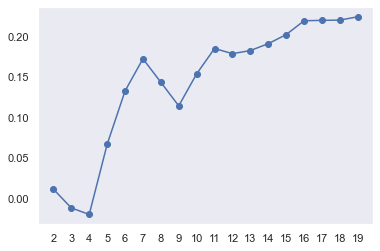

In [55]:
# Graph Results of Calculation Above
plt.plot(range(2, 20), scores)
plt.scatter(range(2, 20), scores)
plt.grid()
_ =plt.xticks(range(2, 20))

Instead of 3, 19 gives us the highest r2 value at around .20 telling the best number of clusters is 19 with k =19

#### Refit the model to the new k value and show Predictions as well as Actuals

In [56]:
model = KNeighborsRegressor(n_neighbors=19, n_jobs=-1)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
[57 55 33 ... 46 31 59]
Predictions for test data set
[39.26315789473684 42.21052631578947 39.8421052631579 ...
 44.578947368421055 35.68421052631579 35.68421052631579]


#### Look at the difference between the two sets above

In [58]:
differs = y_test - preds

print(f'Differences between the two sets:\n{differs}\n')

print(f'r2_score: {r2_score(y_test,preds)}')

Differences between the two sets:
[17.736842105263158 12.789473684210527 -6.842105263157897 ...
 1.4210526315789451 -4.684210526315788 23.315789473684212]

r2_score: 0.22402587317542577


The R2 score is much higher from -0.0117 to .22. This score is not the best, looking at other models would be a good idea. 

## KNN Analysis

- The optimal k value for the data is 19
- Accuracy is .09% 
- The tuned R2 value for KNN is .22 which is a major improvement from -0.012

Improve model:
- We could rescale the model since there are such a large number of data points
- Look at overfitting or underfitting in the model and tune from there to improve accuracy rating. 
The Accuracy rating is really low so it would be important to evaluate the cause of of that. When initially looking at the datset, there were many errors such as labeling missing data as "unknown." Doing so makes it more difficult to look at the missing values and handle them. It is possible those responsbile for collecting the data and working with the dataset made errors which could cause low accuracy scores with the model. 


## Other Regression Algorithms

It is always a good idea to look at other algorthims, especially since the score for KNN r2 value was .22

In [76]:
#Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot

In [77]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='df')))

Spot checking alogorthims is important because it will tell the algorithms best at understanding the structure of the problem

In [78]:
# evaluate each model 
seed = 42
num_folds = 5
scoring = 'neg_mean_squared_error'

In [79]:
#Results of Spot checking Each Model 
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -108.893912 (3.062135)
LASSO: -108.920069 (3.069469)
EN: -108.920055 (3.069455)
KNN: -100.679587 (10.322640)
CART: -81.433157 (1.179639)
SVR: nan (nan)


CART is the closest to zeron at 1.17 making is the best scored alogrithm for the problem

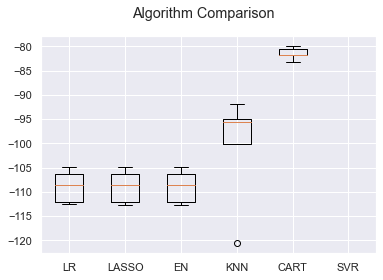

In [80]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

This confirms that CART scores significantly better than all other of the algorthims

#### Look at results again without the highest spot checking scores

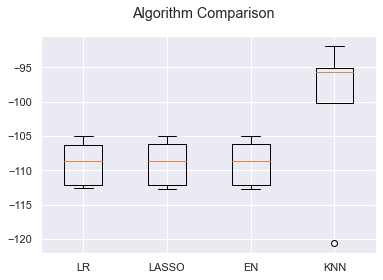

In [81]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results[0:-2])
ax.set_xticklabels(names[0:-2])
pyplot.show()

## Scale the Data

Having a lot of data can affect the algorithims ability to understand the model and accurately trian. Scaling the data helps combat that issue. Also use the Pipeline function to insure all of the data is treated the same

In [82]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(gamma='df'))])))

In [83]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -108.893912 (3.062135)
ScaledLASSO: -108.920069 (3.069469)
ScaledEN: -108.920069 (3.069469)
ScaledKNN: -100.679587 (10.322640)
ScaledCART: -81.433157 (1.179639)
ScaledSVR: nan (nan)


It looks like CART stayed the same from before scaling the data at 1.179, scaling the data did not improve CART score

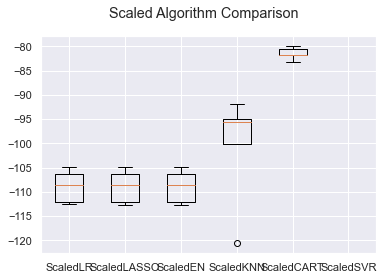

In [84]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Ensemble Methods

In [86]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

In [89]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    target = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(target)

ScaledAB: -87.299631 (1.675632)
ScaledGBM: -81.433164 (1.176308)
ScaledRF: -81.437464 (1.174610)
ScaledET: -81.433157 (1.179639)


All of the ensemble methods preformed better than the algorithms above, untuned GBM scored lower than the tuned CART algorthim

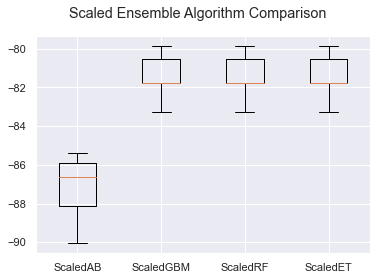

In [88]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Results

- The best model fit for the target is Scaled GBM at 1.176
- In comparison to KNN and Scaled GBM, Scaled GBM is a better fit for the model